Giovanni Gamaliel López Padilla - Tarea 01

In [1]:
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import TweetTokenizer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pandas as pd
import unidecode
import datetime
import nltk
import os


def read_all_text(path: str) -> str:
    """
    Realiza la lectura de todas las conferencias y las reune en un solo string
    Input:
        String: path -> Direccion donde se encuentran todos los archivos

    Output:
        String: Texto plano
    """
    files = sorted(os.listdir(path))
    text = ""
    for file in files:
        # Direccion y nombre del archivo
        filename = "{}{}".format(path, file)
        # Apertura del archivo
        file_text = open(filename, "r", encoding="utf-8")
        # Concadenacion del texto
        text += file_text.read()
        # Cierre del texto
        file_text.close()
    return text


def clean_text(text: str) -> str:
    """
    Limpia un string de los caracteres \n, \t ,\xa0 y espacios en blanco.
    Input:
     String -> Texto plano

    Output:
     Lista de palabras en el texto sin \n, \t, \xa0 y espacios en blanco
    """
    text_out = text.split()
    return text_out


def lexical_diversity(text: str) -> float:
    """
    Mide la riqueza lexica de un documento
    Input: 
        String -> Texto plano

    Output:
        Float -> riqueza lexica del documento
    """
    return len(text) / len(set(text))


def to_unidecode(text: str) -> str:
    """
    Convierte el texto a unidecode
    Input:
        String -> Texto plano

    Output:
        String -> Texto unidecode
    """
    return unidecode.unidecode(text)


def to_lowercase(text: str, use_unidecode: bool = False) -> str:
    """
    Convierte el texto a minusculas usando caracteres unidecode o no
    Input:
        String -> Texto plano
        Bool -> Decision si hace uso de los caracteres unidecode

    Output:
        String -> Texto en minusculas del texto dado
    """
    if use_unidecode:
        return to_unidecode(text.lower())
    else:
        return text.lower()


def exercise_2_point_1_2_3_4(text: str, clean: bool = True) -> None:
    """
    Ejecuta los puntos 1, 2 ,3 y 4 del punto 2 de la tarea
    """
    # Limpia el texto de caracteres \n, \t y \xa0
    if clean:
        text_lines = clean_text(text)
    else:
        text_lines = text
    print("La cantidad de palabras es de {}".format(len(text_lines)))
    # Obtiene las palabras unicas en el texto
    text_set = set(text_lines)
    print("La longitud del vocabulario es de {}".format(len(text_set)))
    # Obtiene la riqueza lexica de las conferencias
    print("La riqueza lexica de las conferencias es de {}".format(
        lexical_diversity(text_lines)))


def obtain_only_words_with_regex_nltk(text: str) -> list:
    """
    Obtiene las palabras usando regexp de nltk de mayusculas y minusculas
    Input:
        String -> Texto plano

    Output:
        List of strings -> Lista de palabras
    """
    # Definicion del tokenizador
    tokenizer = RegexpTokenizer("[a-zA-Z]+")
    # Lista de palabras
    return tokenizer.tokenize(text)


def obtain_only_words_with_tweet_tokenizer(text: str) -> list:
    """
    Obtiene las palabras usando TweetTokenizer de nltk de un texto minusculas
    Input:
        String -> Texto plano

    Output:
        List of strings -> Lista de palabras
    """
    # Crea una referencia para la clase TweetTokenizer
    tk = TweetTokenizer()
    # Creacion de los tokens
    return tk.tokenize(text)


def obtain_len_of_all_words(text: list) -> list:
    """
    Obtiene la longitud de cada palabra en una lista de palabras
    Input: 
        List of strings: Lista de palabras

    Output:
        List of strings: Lista de la longitud de cada palabra
    """
    return [len(word) for word in text]


def print_concordance(text: nltk.Text, word: str) -> None:
    print("\n------ Resultados para {}--------".format(word))
    print(text.concordance(word))


def str_date_to_date(date: str) -> datetime.date:
    """
    Convierte una fecha con el formato yyyy-mm-dd a datetime
    Input:
        String: date -> fecha con formato yyyy-mm-dd
        
    Output:
        datetime: fecha
    """
    year, month, day = date.split("-")
    year = int(year)
    month = int(month)
    day = int(day)
    date = datetime.date(year, month, day)
    return date

def read_text(path, file)-> nltk.Text:
    """
    Abre un archivo, lee su texto y obtiene los tokens usando tweet tokenizer
    Inputs:
        String: path -> direccion del archivo
        String: file -> nombre del archivo
    """
    text = open("{}{}".format(path, file)).read()
    text = clean_text(text)
    text = ' '.join(text)
    words = obtain_only_words_with_tweet_tokenizer(to_lowercase(text, True))
    return words

def cfd_to_dataframe(cfd:nltk.probability.ConditionalFreqDist,target:str)->pd.DataFrame:
    """
    Dado un ConditionalFreqDist obtiene los valores y los guarda en un dataframe
    Inputs:
        ConditionalFreqDist
        String: Nombre del target
    
    Output:
        Dataframe: Valores del ConditionalFreqDist
    """
    dataframe = pd.DataFrame()
    data = cfd[target]
    dates = [key for key in data.keys()]
    values = [data[key] for key in data.keys()]
    dataframe["Dates"] = dates
    dataframe[target] = values
    return dataframe

### 2) Vistazo a los datos
+ 1) Cargue todas las conferencias en un string y aplique la función split para generar tokens
fácilmente.

In [2]:
path="dataset/"
# Lectura de los nombres de los archivos
text = read_all_text(path)

+ 2. Contar la cantidad de palabras en todas las conferencias.
+ 3. Extraer el vocabulario y mostrar su longitud.
+ 4. Mida la riqueza del vocabulario de alguna forma en todos los documentos.

In [3]:
exercise_2_point_1_2_3_4(text)
text_unidecode_lower = to_lowercase(text, True)
exercise_2_point_1_2_3_4(text_unidecode_lower)

La cantidad de palabras es de 8039596
La longitud del vocabulario es de 170688
La riqueza lexica de las conferencias es de 47.10112017247844
La cantidad de palabras es de 8039605
La longitud del vocabulario es de 154406
La riqueza lexica de las conferencias es de 52.06795720373561


+ 5. Haga lo mismo que los 4 puntos anteriores pero con todo el texto en minúsculas. Vea
las diferencias y comente brevemente.

In [4]:
text_lower = to_lowercase(text)
exercise_2_point_1_2_3_4(text_lower)

La cantidad de palabras es de 8039596
La longitud del vocabulario es de 157166
La riqueza lexica de las conferencias es de 51.15353193438784


+ 6. Haga lo mismo que los puntos 1, 2 y 3 usando el tokenizador RegExp de NLTK, con
una expresión regular que trate de sacar solo tokens que pueden contener solo letras
mayúsculas y minúsculas. Después cargue los tokens en un objeto Text de NLTK en
lugar de una lista de Python.

In [5]:
# Convierte el texto en unidecode
text_unidecode = to_unidecode(text)
text_nltk = obtain_only_words_with_regex_nltk(text_unidecode)
exercise_2_point_1_2_3_4(text_nltk, False)

La cantidad de palabras es de 7944645
La longitud del vocabulario es de 74555
La riqueza lexica de las conferencias es de 106.56086110924821


+ 7) Haga todo el texto minúsculas. Haga los mismo que los puntos 1, 2, y 3 usando el
tokenizador TweetTokenizer. Haga el resto de esta tarea asumiendo haber hecho este
punto.

In [6]:
# Convierte el texto en unidecode y en minusculas
text_unidecode_lower = to_lowercase(text, True)
text_tweet = obtain_only_words_with_tweet_tokenizer(text_unidecode_lower)
exercise_2_point_1_2_3_4(text_tweet, False)

La cantidad de palabras es de 9283310
La longitud del vocabulario es de 70357
La riqueza lexica de las conferencias es de 131.94579075287461


## Funciones NLTK
+ 1) Use la función concordance para ver el contexto de 5 palabras que usted elija.

In [7]:
text_nltk = nltk.Text(text_tweet)
print_concordance(text_nltk, "dengue")
print_concordance(text_nltk, "contingencia")
print_concordance(text_nltk, "periodistas")
print_concordance(text_nltk, "hospitales")
print_concordance(text_nltk, "metro")


------ Resultados para dengue--------
Displaying 25 of 121 matches:
 , nuestra preocupacion respecto al dengue o respecto a cualquier otro tipo de
lo de la agenda . pregunta : lo del dengue , por favor , a groso modo , los ca
favor , a groso modo , los casos de dengue , presidente . presidente andres ma
n mas de 300 por ciento en casos de dengue y tambien se tiene un reporte de qu
ion , no tenemos ese dato de lo del dengue , del incremento del dengue . no . 
 lo del dengue , del incremento del dengue . no . y lo de las medicinas , hay 
asi todo . entonces , ? como que el dengue es porque no se compraron los insec
e insecticidas haya una epidemia de dengue , no lo he visto . he estado en los
o en un hospital , unos enfermos de dengue , pero no es un asunto generalizado
 vamos a tener informacion sobre el dengue . ayer me preguntaron de este tema 
ue por eso crecio la influencia del dengue en el pais . se pidio informacion s
squito , que es el que transmite el dengue . entonces , tiene 

+ 2) Elija una palabra que le parezca interesante y muestre palabras con uso similar. Muestre
también los contextos comunes

In [8]:
text_nltk.similar("muerte")

salud vida seguridad que atencion corrupcion semana informacion
violencia poblacion administracion vacunacion educacion investigacion
familia vacuna manana justicia inversion produccion


+ 3) Generar un dispersion plot de las
siguientes palabras: prian, corrupción, mafia, narco, gasolina, pipas, conacyt, ciencia,
turismo, pandemia, coronavirus, covid, delta, omicron, vacuna, vacunacion. y otras
tres palabras de su elección.

/home/giovanni/.local/lib/python3.8/site-packages/nltk/draw/__init__.py:15: UserWarning: nltk.draw package not loaded (please install Tkinter library).
  warnings.warn("nltk.draw package not loaded (please install Tkinter library).")


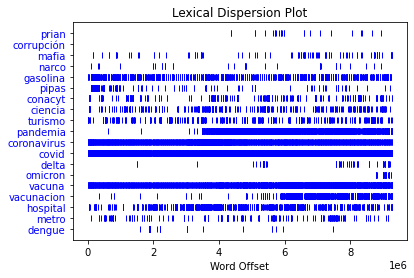

In [9]:
words = ["prian",
         "corrupción",
         "mafia",
         "narco",
         "gasolina",
         "pipas",
         "conacyt",
         "ciencia",
         "turismo",
         "pandemia",
         "coronavirus",
         "covid",
         "delta",
         "omicron",
         "vacuna",
         "vacunacion",
         "hospital",
         "metro",
         "dengue"]
text_nltk.dispersion_plot(words)

+ 4) Muestre 50 colocaciones de todo el corpus.

In [10]:
text_nltk.collocations(num=50)

lopez obrador; andres manuel; manuel lopez; presidente andres; estados
unidos; por ciento; buenos dias; version estenografica; senor
presidente; prensa matutina; todos los; nada mas; guardia nacional;
muchas gracias; adultos mayores; desde luego; por eso; por ejemplo;
marcelo ebrard; derechos humanos; tren maya; mil millones; sin
embargo; todas las; muy importante; que que; baja california; matutina
del; sobre todo; creo que; ebrard casaubon; muy bien; quintana roo;
nuestro pais; tiene que; ver con; para que; sembrando vida; benito
juarez; que nos; los trabajadores; comision federal; gobierno federal;
hugo lopez-gatell; dos bocas; 5093 4900; documentosdocumentos
gabinetegabinete; reserved developed; rights reserved; 01800 080 1127


+ 5) Muestre un histograma de longitud en caracteres de las palabras. Muestre en el his-
tograma el top 5 de longitudes más largas.

(array([3.3986e+04, 3.5405e+04, 8.8000e+02, 5.5000e+01, 1.6000e+01,
        5.0000e+00, 1.0000e+00, 0.0000e+00, 8.0000e+00, 1.0000e+00]),
 array([ 1.,  9., 17., 25., 33., 41., 49., 57., 65., 73., 81.]),
 <BarContainer object of 10 artists>)

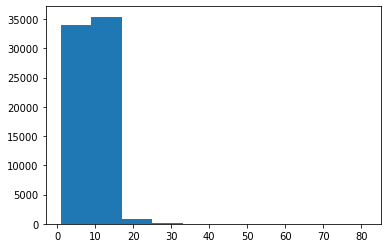

In [11]:
word_len = obtain_len_of_all_words(set(text_nltk))
plt.hist(word_len)

+ 6) Muestre 50 palabras con longitud mayor a 8 caracteres y frecuencia mayor a 5 en todo
el texto usando comprenhension list de python.

In [12]:
word_dist = FreqDist(text_nltk)
words_select = list(
    set([word for word in text_nltk if len(word) > 8 and word_dist[word] > 5]))
words_select[:50]

['kilogramo',
 'denunciados',
 'subsecuentes',
 'encubierta',
 'ahorrando',
 'defendemos',
 'virtualmente',
 'encuestadoras',
 'recuperarlo',
 'indirecta',
 'archivaldo',
 'establecido',
 'caracteristicamente',
 'demandaban',
 'incidente',
 'ministros',
 'atendimos',
 'trasladado',
 'sensibilizacion',
 'increible',
 'servidora',
 'regularizacion',
 'quintanarroenses',
 'tlaquepaque',
 'celebrando',
 'disminuir',
 'deteriorando',
 'transfirio',
 'utilizarse',
 'exigencia',
 'exonerado',
 'verdaderas',
 'industrial',
 'cancelarla',
 'necesitaran',
 'cuajinicuilapa',
 'certificaciones',
 'residencia',
 'regulador',
 'transferian',
 'apartados',
 'indagatoria',
 'refacciones',
 'regresaramos',
 'estudiarlo',
 'vasconcelos',
 'plebiscito',
 'remesadora',
 'finalidad',
 'polarizado']

+ 8) Use la lista de stopwords de nltk y obtenga la cantidad de palabras en los datos con y
sin stopword.

In [13]:
stopwords = stopwords.words('spanish')
text_without_stopwords = [word for word in text_nltk if not word in stopwords]

In [14]:
print("Esta es la cantidad de palabras sin filtrar las stopwords {}".format(len(text_nltk)))
print("Esta es la cantidad de palabras filtrando las stopwords {}".format(
    len(text_without_stopwords)))

Esta es la cantidad de palabras sin filtrar las stopwords 9283310
Esta es la cantidad de palabras filtrando las stopwords 5295150


+ 9) Muestre las 300 palabras más frecuentes en las conferencias, sin tomar en cuenta stop-
words. Muéstrelas de la más frecuente a la menos frecuente.

In [15]:
word_dist = FreqDist(text_without_stopwords)
i = 0
for word in word_dist:
    print("Palabra {: >3}: {: >15}\tFrecuencia: {}".format(
        i+1, word, word_dist[word]))
    i += 1
    if i == 300:
        break

Palabra   1:               ,	Frecuencia: 714282
Palabra   2:               .	Frecuencia: 306394
Palabra   3:               ?	Frecuencia: 71520
Palabra   4:               :	Frecuencia: 67257
Palabra   5:      presidente	Frecuencia: 53786
Palabra   6:              si	Frecuencia: 48032
Palabra   7:             mas	Frecuencia: 37337
Palabra   8:         tambien	Frecuencia: 30351
Palabra   9:           lopez	Frecuencia: 28184
Palabra  10:          manuel	Frecuencia: 27917
Palabra  11:         obrador	Frecuencia: 27596
Palabra  12:          andres	Frecuencia: 27409
Palabra  13:        entonces	Frecuencia: 25595
Palabra  14:              va	Frecuencia: 25043
Palabra  15:           vamos	Frecuencia: 25015
Palabra  16:          mexico	Frecuencia: 23938
Palabra  17:               ;	Frecuencia: 23365
Palabra  18:             mil	Frecuencia: 21036
Palabra  19:               -	Frecuencia: 19070
Palabra  20:           estan	Frecuencia: 18482
Palabra  21:               '	Frecuencia: 17639
Palabra  22

+ 7) Ver https://www.nltk.org/book/ch02.html en la sección 1.5. Proponga una gráfica
usando ConditionalFreqDist como la de la Sección 1.5 para estos datos. Usted elige las
palabras.

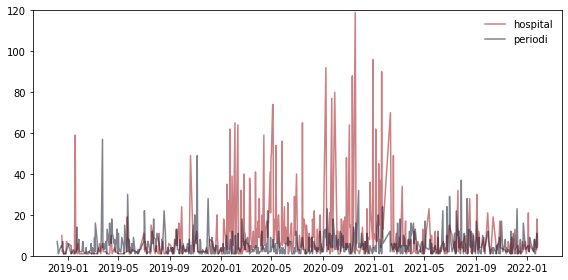

In [16]:
targets = ["hospital", "periodi"]
colors = {"hospital": "#9d0208",
          "periodi": "#03071e"}
files = sorted(os.listdir(path))
cfd = nltk.ConditionalFreqDist((target, str_date_to_date(file[:10]))
                               for file in files
                               for word in read_text(path, file)
                               for target in ["hospital", "periodi"]
                               if word.startswith(target))
dataframe_hospital = cfd_to_dataframe(cfd,targets[0])
dataframe_periodi = cfd_to_dataframe(cfd, targets[1])
plt.subplots(figsize=(8, 4))
plt.plot(dataframe_hospital["Dates"],
             dataframe_hospital[targets[0]],
             color=colors[targets[0]],
             label=targets[0],
             alpha=0.5)
plt.plot(dataframe_periodi["Dates"],
             dataframe_periodi[targets[1]],
             color=colors[targets[1]],
             label=targets[1],
             alpha=0.5)
plt.ylim(0, 120)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()

## Otras librerı́as en Python
+ 1) Mencione dos librerı́as en Python además de NLTK para NLP. Ponga una desventaja
y ventaja de cada una.

| Libreria     |                                   Ventaja                                  |                           Desventaja                           |
|--------------|:--------------------------------------------------------------------------:|:--------------------------------------------------------------:|
| Spacy        | Se encuentra optimizada<br>para cada tarea                                 | No es tan flexible                                             |
| scikit-learn | Provee un conjunto de algoritmos<br>para crear modelos de machine learning | No usa redes neuronales para<br>el preprocesamiento de textos  |

+ 2) Mencione tres alternativas para Text Processing en NLP qué existen en otros lenguajes. De una ventaja y desventaja de cada una.

| Libreria                        | Ventaja                                                                                                            | Desventaja                                                                    |
|---------------------------------|--------------------------------------------------------------------------------------------------------------------|-------------------------------------------------------------------------------|
| Google AutoML: lenguaje natural | Ofrece una gran documentación y <br>variedad de modelos para realizar <br>diversos análisis de aspectos del texto  | A partir de la cantidad de peticiones<br>tiene un precio por la API           |
| TextRazor                       | Implementación para PHP para un<br>análisis de texto en navegadores web                                            | Puede tener una latencia grande,<br>ya que la misma documentación lo advierte |
| Text Summarization              | Ofrece resumenes de forma sencilla<br>realizandon peticiones https                                                 | Realiza una única funcion.<br>Crear resumenes del texto                       |